# Linear Regression of Predicting Price of new Diamend

## Step 1: Import all important libraries 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

## Step 2: Load CSV file into DataFrame

In [7]:
df_diamond = pd.read_csv("data/diamonds.csv", index_col=False)

In [8]:
# Explore the first five rows
df_diamond.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


## Step 3: Data Visualization and Preprocessing the data

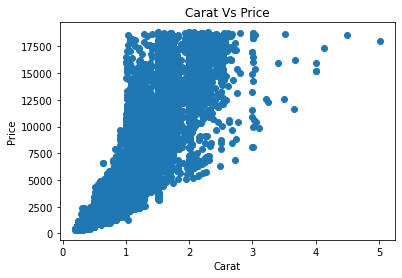

In [174]:
# Visualize the data carat vs price
ax = plt.scatter(df_diamond['carat'], df_diamond['price'])
plt.title('Carat Vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [175]:
#check the size of the data point
df_diamond.shape

(50000, 8)

In [176]:
# Check the type of the data
df_diamond.dtypes

Unnamed: 0       int64
carat          float64
cut             object
cut_ord          int64
color           object
clarity         object
clarity_ord      int64
price            int64
dtype: object

In [177]:
# Check the missing values
df_diamond.isnull().sum()

Unnamed: 0     0
carat          0
cut            0
cut_ord        0
color          0
clarity        0
clarity_ord    0
price          0
dtype: int64

# Pre-processing:  Feature selection/extraction

## Convert Categorical features to numerical values using one hot encoding

In [178]:
# Count the categories
df_diamond['cut'].value_counts()

Ideal        19977
Premium      12792
Very Good    11184
Good          4547
Fair          1500
Name: cut, dtype: int64

#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

In [179]:
df_cut = pd.get_dummies(df_diamond['cut'], drop_first=True)
df_cut.head()

,Good,Ideal,Premium,Very Good
0,0,0,1,0
1,0,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,1,0,0


In [180]:
df_diamond['color'].value_counts()

G    10448
E     9056
F     8843
H     7704
D     6268
I     5076
J     2605
Name: color, dtype: int64

In [181]:
df_color = pd.get_dummies(df_diamond['color'], drop_first=True)
df_color.head()

,E,F,G,H,I,J
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [182]:
df_diamond['clarity'].value_counts()

SI1     12097
VS2     11355
SI2      8523
VS1      7599
VVS2     4700
VVS1     3379
IF       1661
I1        686
Name: clarity, dtype: int64

In [183]:
df_clarity = pd.get_dummies(df_diamond['clarity'], drop_first=True)
df_clarity.head()

,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0


# Select features and Concatenate all together

In [184]:
features = pd.concat([df_diamond['carat'], df_cut, df_clarity, df_color], axis=1)
features.head()

,carat,Good,Ideal,Premium,Very Good,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,E,F,G,H,I,J
0,0.51,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,2.25,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.70,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.47,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0.30,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [185]:
# Ready X and y for prediction
X = features
y = df_diamond['price']
X[:5]

,carat,Good,Ideal,Premium,Very Good,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,E,F,G,H,I,J
0,0.51,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,2.25,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.70,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0.47,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0.30,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [186]:
## adding the constant
X = sm.add_constant(X)
## creating the model
model = sm.OLS(y, X).fit()

In [187]:
# The summary of the regression model as follows
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                 3.038e+04
Date:                Sun, 06 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:48:59   Log-Likelihood:            -4.2360e+05
No. Observations:               50000   AIC:                         8.472e+05
Df Residuals:                   49981   BIC:                         8.474e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7382.2906     53.574   -137.796      0.0

# Predict the prices of the new-diamond dataset

Load the dataset

In [5]:
df_new = pd.read_csv('data/new-diamonds.csv')
df_new.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord
0,1,1.22,Premium,4,G,SI1,3
1,2,1.01,Good,2,G,VS2,5
2,3,0.71,Very Good,3,I,VS2,5
3,4,1.01,Ideal,5,D,SI2,2
4,5,0.27,Ideal,5,H,VVS2,6


Preprocessing the data

In [189]:
df_cut_new = pd.get_dummies(df_new['cut'], drop_first=True)
df_color_new = pd.get_dummies(df_new['color'], drop_first=True)
df_clarity_new = pd.get_dummies(df_new['clarity'], drop_first=True)

test_X = pd.concat([df_new['carat'], df_cut_new, df_clarity_new, df_color_new], axis=1)
test_X[:5]

,carat,Good,Ideal,Premium,Very Good,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,E,F,G,H,I,J
0,1.22,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1.01,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0.71,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1.01,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0.27,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [190]:
## new features
test_X = sm.add_constant(test_X)
## Predict the price
predicted_prices = model.predict(test_X)

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [191]:
# Predict the X_test
predicted_prices[:5]

0    7421.610821
1    5994.742441
2    2570.560912
3    5227.956009
4      21.942461
dtype: float64

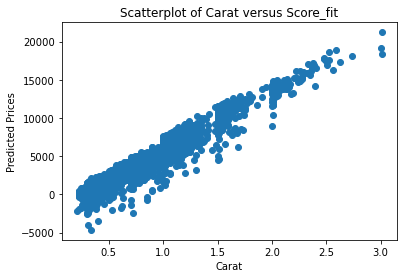

In [192]:
# Scatter plot of the carat vs the new predicted prices
ax = plt.scatter(test_X['carat'], predicted_prices)
plt.title("Scatterplot of Carat versus Score_fit")
plt.xlabel("Carat")
plt.ylabel("Predicted Prices")
plt.show()

In [193]:
print('The recommended price of the bid would be = ${:,.2f}'.format(predicted_prices.sum()*0.7))

The recommended price of the bid would be = $8,230,695.69
